In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/Users/adam.amster/Downloads/cmi-detect-behavior-with-sensor-data/train.csv')

In [4]:
data['sequence_id'].nunique()

8151

In [3]:
data.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
data['sequence_type'].unique()

array(['Target', 'Non-Target'], dtype=object)

In [5]:
data['sequence_id'].nunique()

8151

In [6]:
data['behavior'].unique()

array(['Relaxes and moves hand to target location',
       'Hand at target location', 'Performs gesture',
       'Moves hand to target location'], dtype=object)

In [16]:
data[(data['subject'] == 'SUBJ_059520')].groupby(['orientation', 'gesture', 'sequence_id'])['behavior'].unique()

orientation      gesture                sequence_id
Lie on Back      Above ear - pull hair  SEQ_038034     [Relaxes and moves hand to target location, Ha...
                                        SEQ_058848     [Moves hand to target location, Hand at target...
                 Cheek - pinch skin     SEQ_028066     [Moves hand to target location, Hand at target...
                                        SEQ_041095     [Relaxes and moves hand to target location, Ha...
                 Eyebrow - pull hair    SEQ_038820     [Moves hand to target location, Hand at target...
                                                                             ...                        
Seated Straight  Text on phone          SEQ_064272     [Relaxes and moves hand to target location, Ha...
                 Wave hello             SEQ_027732     [Moves hand to target location, Hand at target...
                                        SEQ_050466     [Relaxes and moves hand to target location, Ha...
   

<Axes: ylabel='Frequency'>

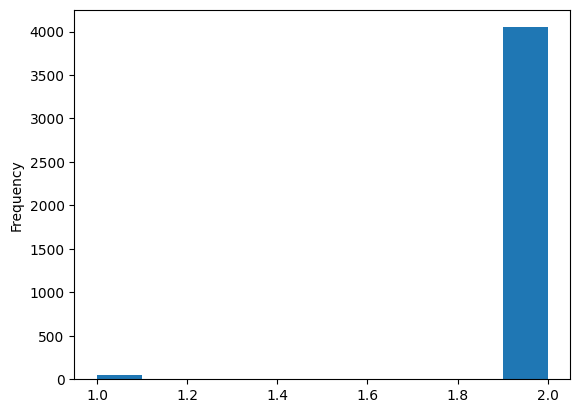

In [20]:
data.groupby(['subject', 'orientation', 'gesture'])['sequence_id'].nunique().plot.hist()

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Seated Straight


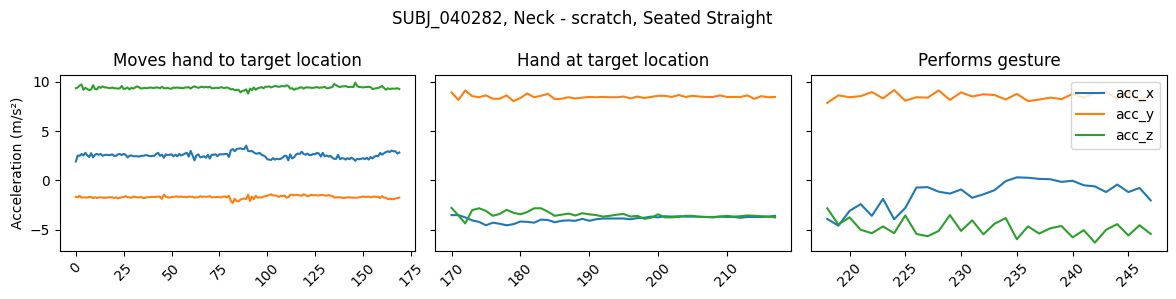

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Seated Straight


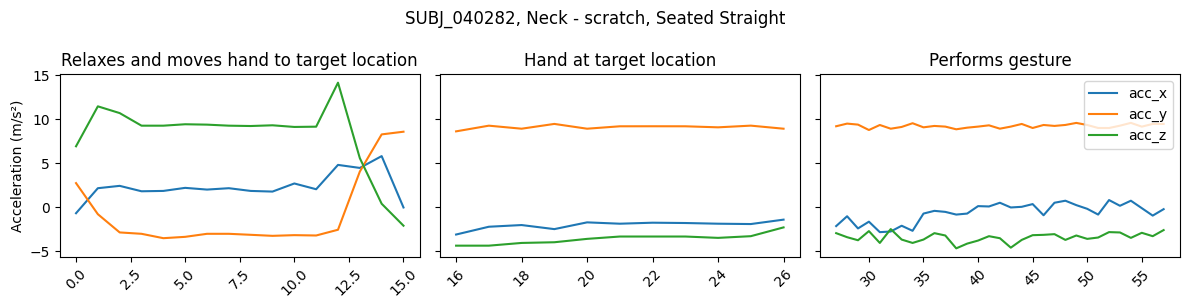

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Lie on Side - Non Dominant


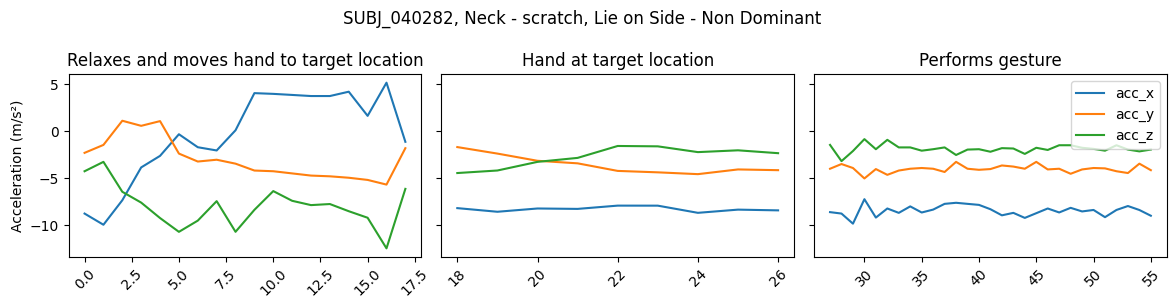

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Lie on Side - Non Dominant


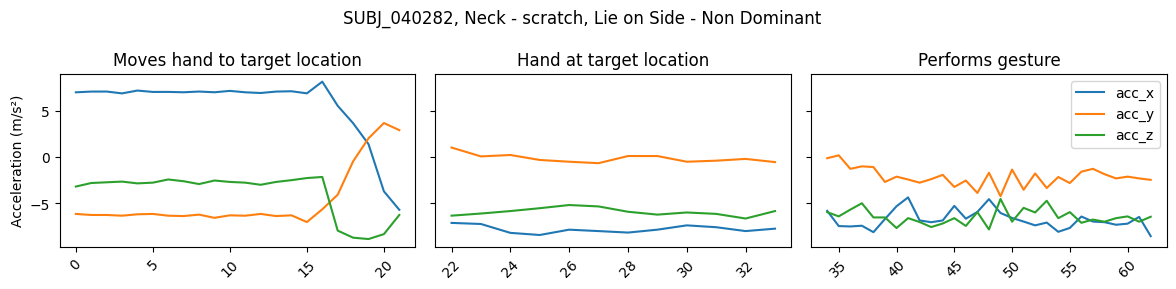

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Lie on Back


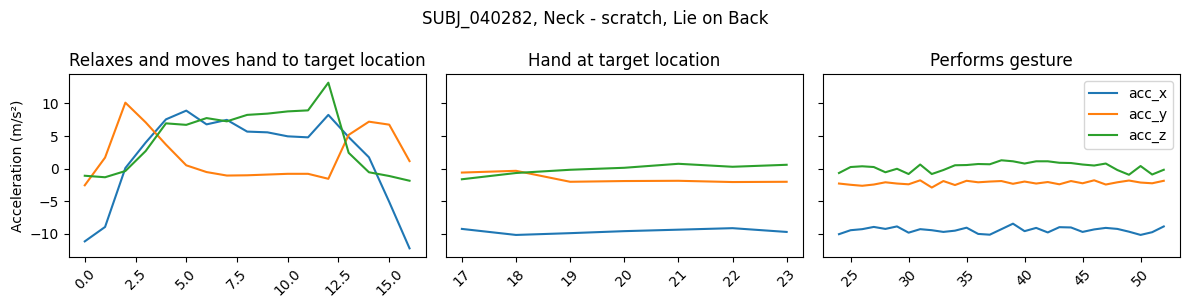

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Lie on Back


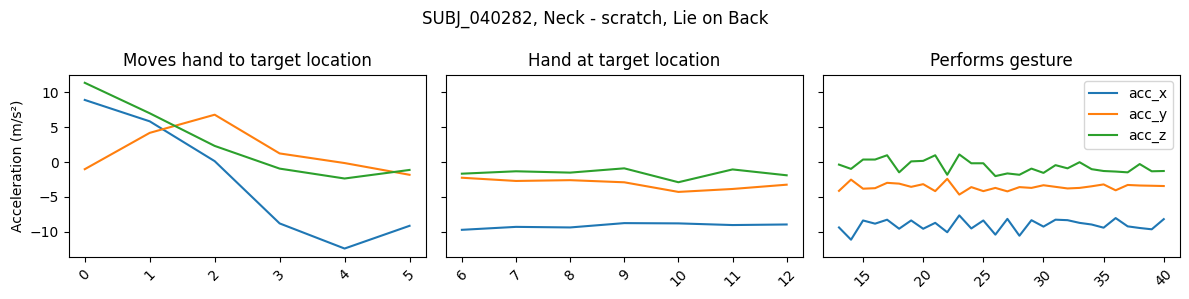

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Seated Lean Non Dom - FACE DOWN


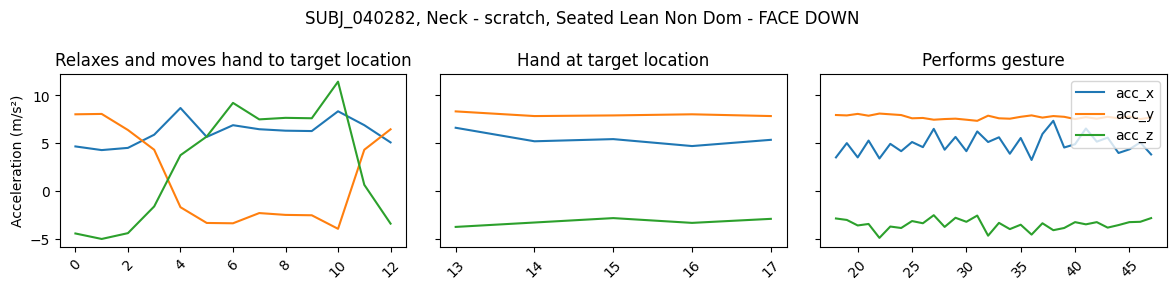

subject: SUBJ_040282, gesture: Neck - scratch, orientation: Seated Lean Non Dom - FACE DOWN


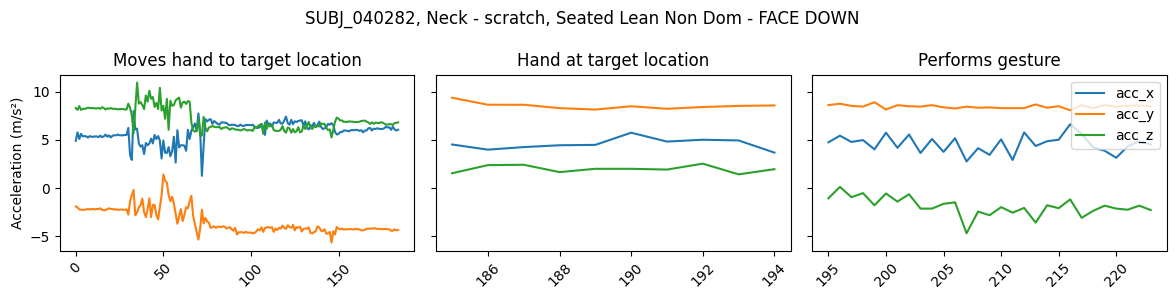

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sequence():
    sequence_ids = data['sequence_id'].unique()
    np.random.shuffle(sequence_ids)
    sequence_id = sequence_ids[0]

    gesture = data[(data["sequence_id"] == sequence_id)]['gesture'].iloc[0]
    subject = data[(data["sequence_id"] == sequence_id)]['subject'].iloc[0]
    subject_gesture_sequences = data[(data['subject'] == subject) & (data['gesture'] == gesture)]

    orientations = subject_gesture_sequences['orientation'].unique()
    for orientation in orientations:
        subject_gesture_sequence_orientation = subject_gesture_sequences[subject_gesture_sequences['orientation'] == orientation]
        subject_gesture_sequence_orientation_sequence_ids = subject_gesture_sequence_orientation['sequence_id'].unique()
        for subject_gesture_sequence_orientation_sequence_id in subject_gesture_sequence_orientation_sequence_ids:
            sequence = subject_gesture_sequence_orientation.query(
                f"sequence_id == '{subject_gesture_sequence_orientation_sequence_id}'"
            )
            behaviors = sequence['behavior'].dropna().unique()
            n = len(behaviors)

            fig, axes = plt.subplots(
                nrows=1, ncols=n, figsize=(4*n, 3), sharey=True
            )

            for ax, beh in zip(axes, behaviors):
                sub = sequence.loc[sequence['behavior'] == beh, ['sequence_counter', 'acc_x', 'acc_y', 'acc_z']]
                ax.plot(sub['sequence_counter'], sub['acc_x'], label='acc_x')
                ax.plot(sub['sequence_counter'], sub['acc_y'], label='acc_y')
                ax.plot(sub['sequence_counter'], sub['acc_z'], label='acc_z')
                ax.set_title(str(beh))
                ax.tick_params(axis='x', rotation=45)

            axes[0].set_ylabel("Acceleration (m/s²)")
            axes[-1].legend(loc='upper right')
            print(f"subject: {subject}, gesture: {gesture}, orientation: {orientation}")
            plt.suptitle(f"{subject}, {gesture}, {orientation}")
            fig.tight_layout()
            plt.show()

plot_sequence()

<Axes: xlabel='sequence_type'>

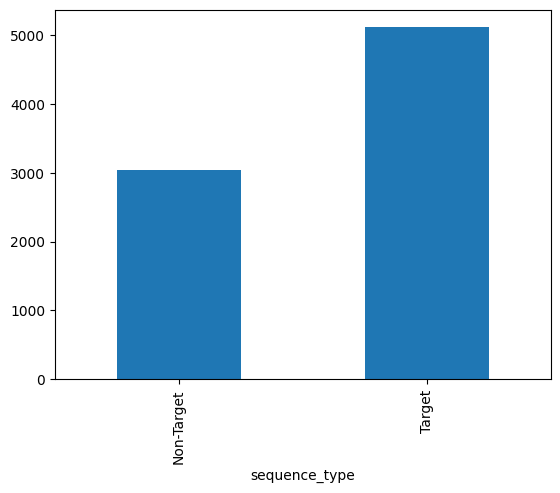

In [38]:
data.drop_duplicates(subset=['sequence_id']).groupby('sequence_type').size().plot.bar()

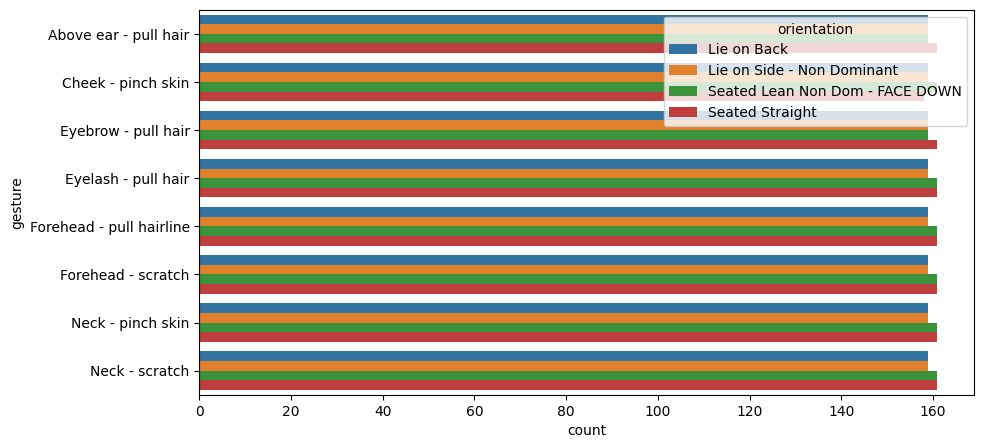

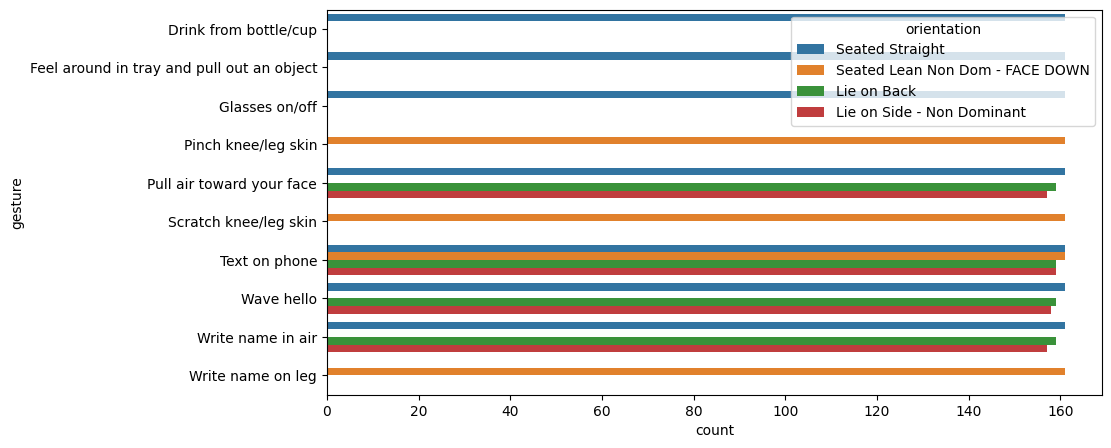

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
target_gesture_counts = data[data['sequence_type'] == 'Target'].drop_duplicates(subset=['sequence_id']).groupby(['gesture', 'orientation']).size().reset_index(name='count')
non_target_gesture_counts = data[data['sequence_type'] != 'Target'].drop_duplicates(subset=['sequence_id']).groupby(['gesture', 'orientation']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=target_gesture_counts, y='gesture', x='count', hue='orientation', orient='h', ax=ax)
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=non_target_gesture_counts, y='gesture', x='count', hue='orientation', orient='h', ax=ax)
plt.show()

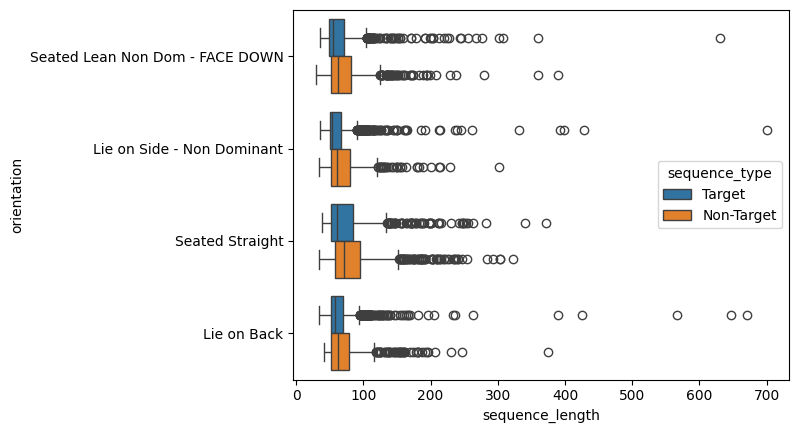

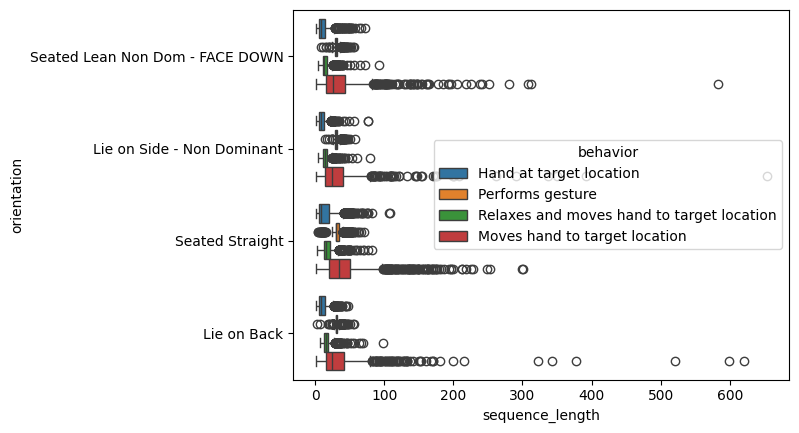

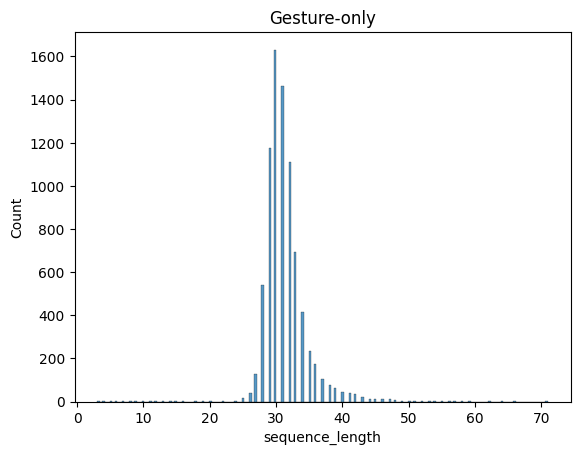

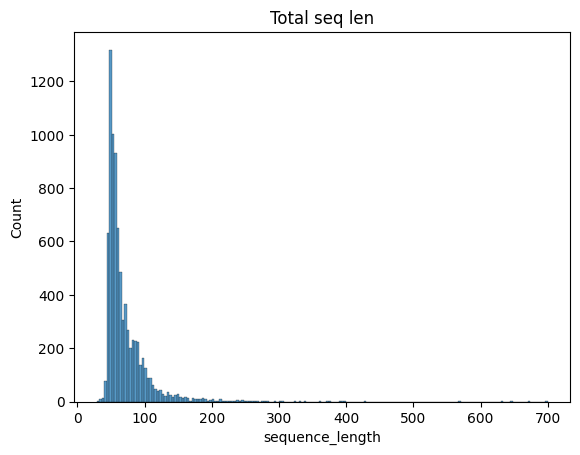

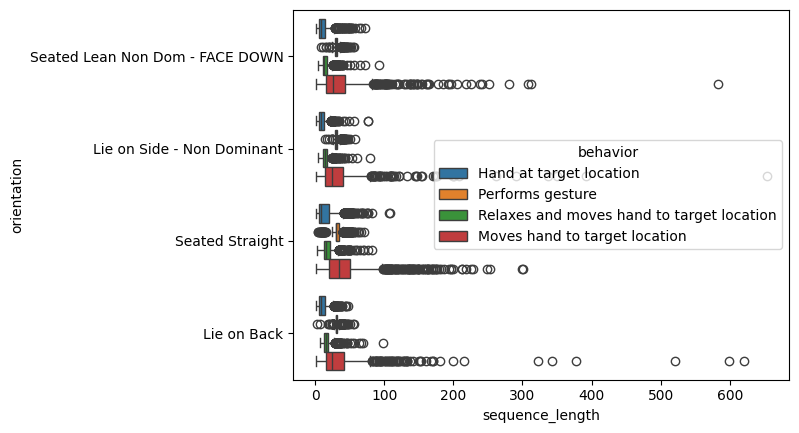

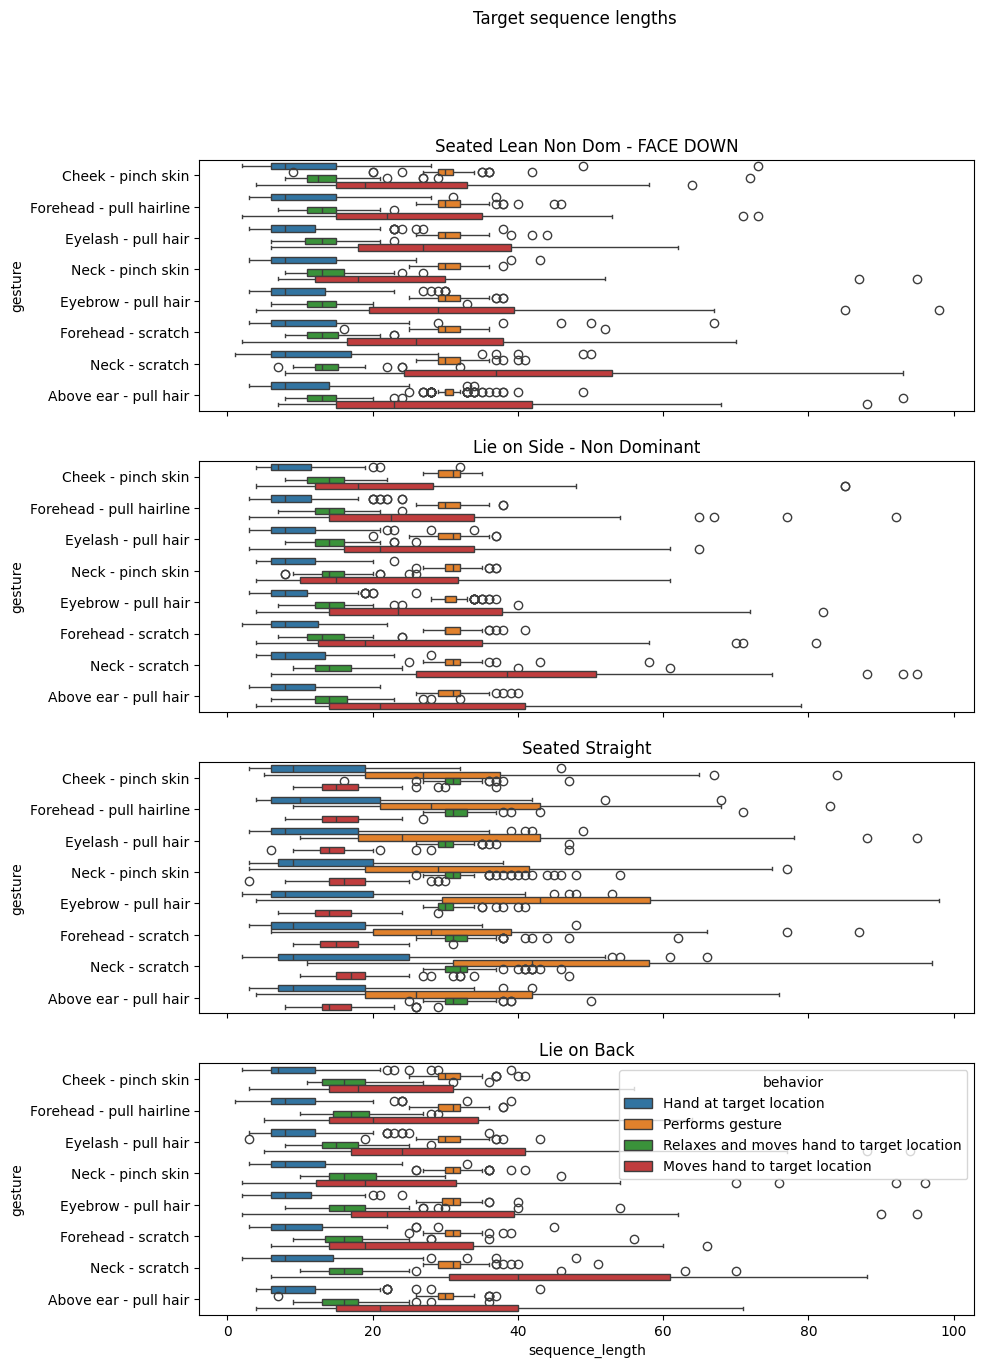

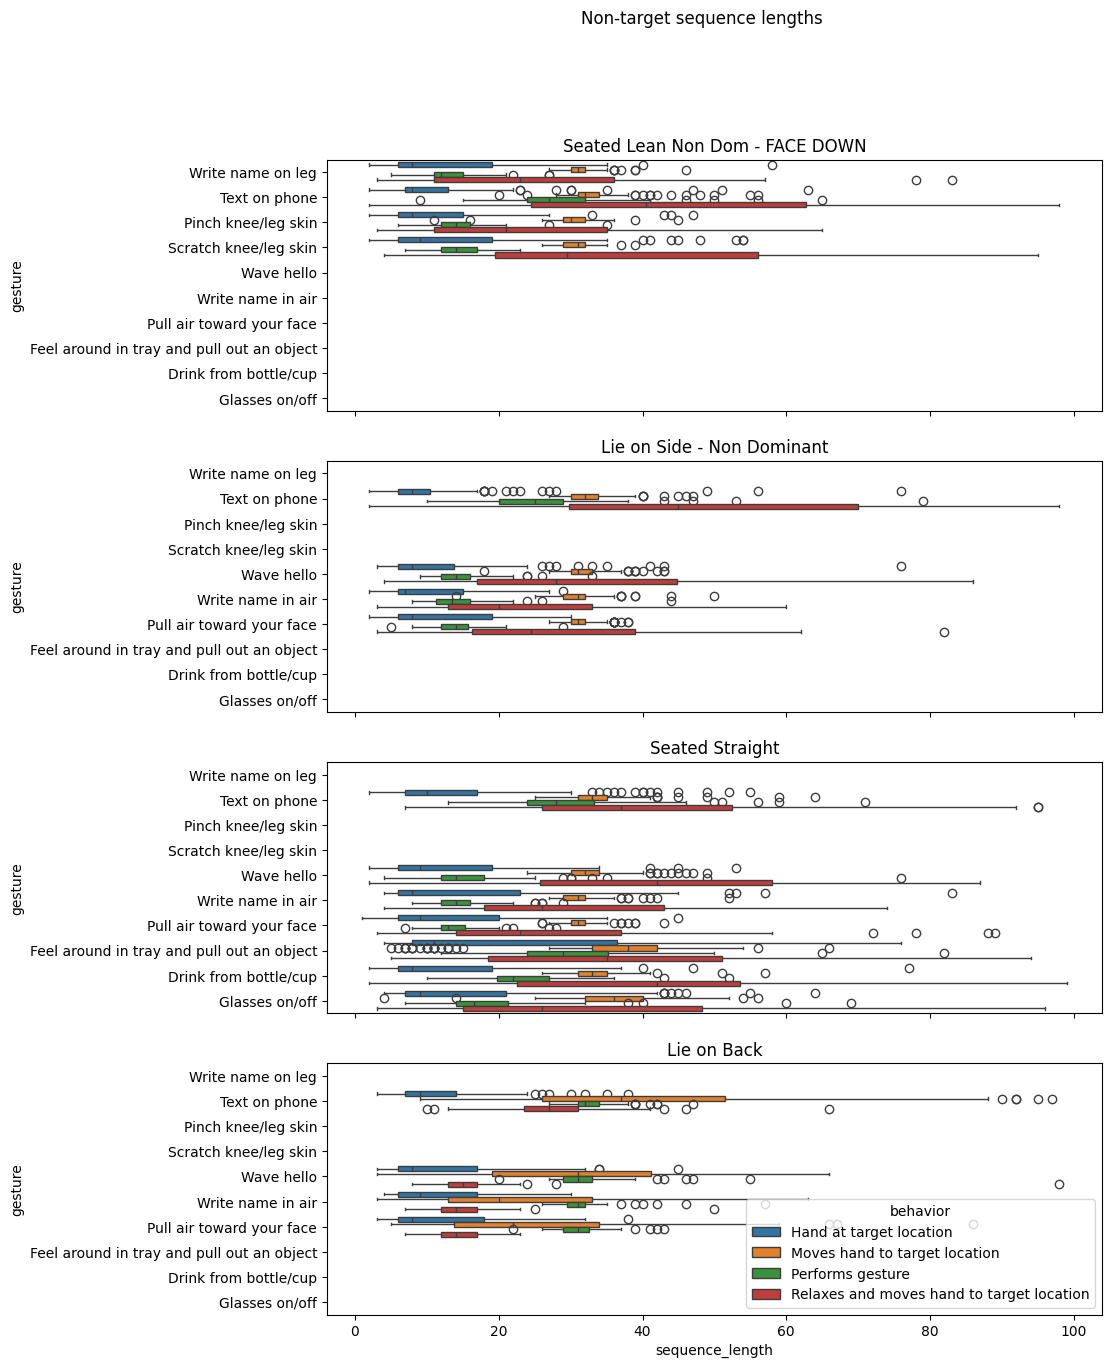

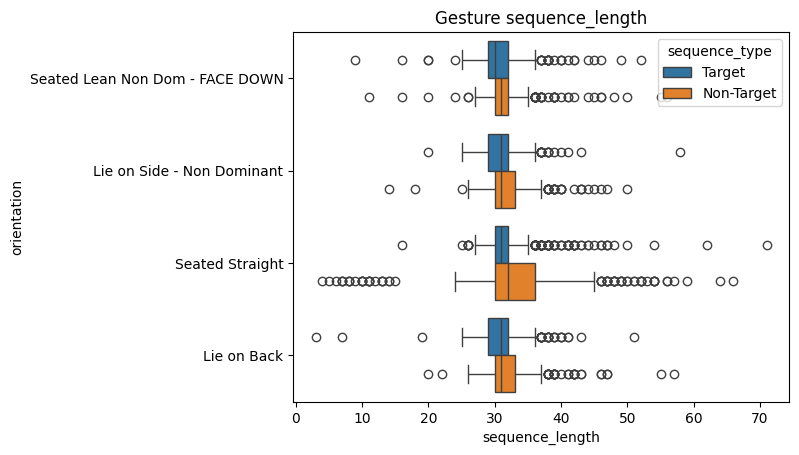

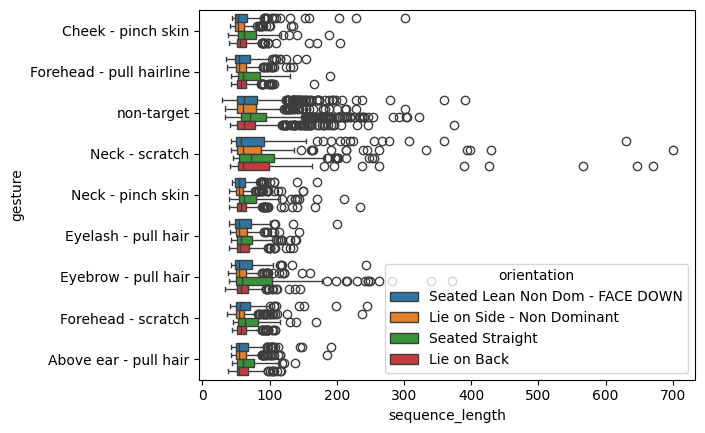

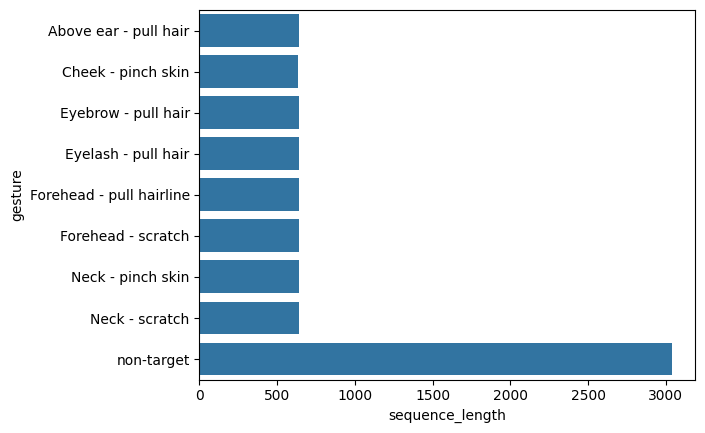

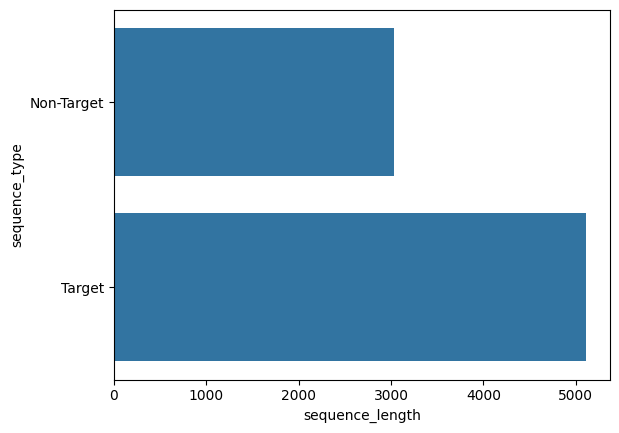

In [87]:
seq_lens = data.groupby(['sequence_id', 'sequence_type', 'orientation']).size().reset_index(name='sequence_length')

sns.boxplot(data=seq_lens, y='orientation', x='sequence_length', hue='sequence_type', orient='h')
plt.show()

behavior_seq_lens = data.groupby(['sequence_id', 'behavior', 'orientation']).size().reset_index(name='sequence_length')

sns.boxplot(data=behavior_seq_lens, y='orientation', x='sequence_length', hue='behavior', orient='h')
plt.show()

gesture_seq_lens = data[data['behavior'] == 'Performs gesture'].groupby(['sequence_id', 'sequence_type', 'orientation']).size().reset_index(name='sequence_length')

sns.histplot(data=gesture_seq_lens, x='sequence_length')
plt.title('Gesture-only')
plt.show()

sns.histplot(data=seq_lens, x='sequence_length')
plt.title('Total seq len')
plt.show()

sns.boxplot(data=data.groupby(['sequence_id', 'sequence_type', 'orientation', 'behavior']).size().reset_index(name='sequence_length'), x='sequence_length', y='orientation', hue='behavior')
plt.show()

fig, ax = plt.subplots(figsize=(10, 15), ncols=1, nrows=data['orientation'].nunique(), sharey=True, sharex=True)
for i, orientation in enumerate(data['orientation'].unique()):
    sns.boxplot(data=data[data['sequence_type'] == 'Target'].groupby(['sequence_id', 'orientation', 'behavior', 'gesture']).size().reset_index(name='sequence_length').loc[lambda x: (x['sequence_length'] < 100) & (x['orientation'] == orientation)], x='sequence_length', y='gesture', hue='behavior', ax=ax[i], legend=i == data['orientation'].nunique()-1)
    ax[i].set_title(orientation)
plt.suptitle('Target sequence lengths')
plt.show()

fig, ax = plt.subplots(figsize=(10, 15), ncols=1, nrows=data['orientation'].nunique(), sharey=True, sharex=True)
for i, orientation in enumerate(data['orientation'].unique()):
    sns.boxplot(data=data[data['sequence_type'] != 'Target'].groupby(['sequence_id', 'orientation', 'behavior', 'gesture']).size().reset_index(name='sequence_length').loc[lambda x: (x['sequence_length'] < 100) & (x['orientation'] == orientation)], x='sequence_length', y='gesture', hue='behavior', ax=ax[i], legend=i == data['orientation'].nunique()-1)
    ax[i].set_title(orientation)
plt.suptitle('Non-target sequence lengths')
plt.show()

sns.boxplot(data=gesture_seq_lens, y='orientation', x='sequence_length', hue='sequence_type', orient='h')
plt.title('Gesture sequence_length')
plt.show()

gesture_seq_lens = data.groupby(['sequence_id', 'sequence_type', 'gesture', 'orientation']).size().reset_index(name='sequence_length')
gesture_seq_lens.loc[gesture_seq_lens['sequence_type'] != 'Target', 'gesture'] = 'non-target'
sns.boxplot(data=gesture_seq_lens, x='sequence_length', y='gesture', hue='orientation')
plt.show()

sns.barplot(data=gesture_seq_lens.groupby('gesture').size().reset_index(name='sequence_length'), x='sequence_length', y='gesture', orient='h')
plt.show()

sns.barplot(data=gesture_seq_lens.groupby('sequence_type').size().reset_index(name='sequence_length'), x='sequence_length', y='sequence_type', orient='h')
plt.show()

In [98]:
behavior_seq_lens.groupby('behavior').describe()

sequence_length             \
                                                    count       mean   
behavior                                                               
Hand at target location                            8151.0  11.676236   
Moves hand to target location                      4102.0  38.145783   
Performs gesture                                   8150.0  31.388589   
Relaxes and moves hand to target location          4049.0  16.666090   

                                                                             \
                                                 std  min   25%   50%   75%   
behavior                                                                      
Hand at target location                     8.631705  1.0   6.0   8.0  16.0   
Moves hand to target location              40.795285  2.0  17.0  28.0  45.0   
Performs gesture                            3.586293  3.0  30.0  31.0  32.0   
Relaxes and moves hand to target location   7.273024  3.0  12.0  15.0  19.0   

                                                  
                                             max  
behavior                                          
Hand at target location                    108.0  
Moves hand to target location              653.0  
Performs gesture                            71.0  
Relaxes and moves hand to target location   98.0

In [107]:
import numpy as np
behavior_seq_lens[behavior_seq_lens['behavior'] == 'Performs gesture']['sequence_length'].quantile((np.arange(0, 1, .1/100)))

0.000     3.000
0.001     8.000
0.002    10.298
0.003    13.000
0.004    17.192
          ...  
0.995    48.000
0.996    49.000
0.997    51.000
0.998    54.000
0.999    56.000
Name: sequence_length, Length: 1000, dtype: float64

In [115]:
contains_gesture = data.groupby('sequence_id')['behavior'].apply(lambda x: 'Performs gesture' in x.values)
contains_gesture[~contains_gesture].index

Index(['SEQ_011975'], dtype='object', name='sequence_id')

In [11]:
import numpy as np
print(np.nanmean(data[['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']].values, axis=0).tolist())
print(np.nanstd(data[['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']].values, axis=0).tolist())

[1.6399796189744236, 1.790703594474254, -0.45981063270182365, 0.36037534690736855, -0.11991601069819327, -0.05995317416806099, -0.18829815529791255]
[5.781253985376394, 5.003941058357719, 6.096484699468417, 0.22573912799066284, 0.46552001098903634, 0.5430271823494489, 0.5041364764608589]
